Session 1 Homework Solution
=========================
This is the homework for the first session of the MolSSI Python Scripting Level 2 Workshop.
This homework is intended to give you practice with the material covered in the first session. 

Goals:
 - Utilize pandas to read in and work with the data in a csv file.
 - Utilize matplotlib to create plots and subplots of data stored in a pandas dataframe.
 - Utilize pandas to extract specific information from a dataframe.
 - Utilize matplotlib to construct a plot with multiple groups of data.

## Exercise 1
Using the `PubChemElements_all.csv` file used during Session 1, create a plot of the Ionization Energy trend of the periodic table. The trend can be visualized by plotting the Ionization Energy of each element against it's Atomic Number. HINT: Use pandas to read in the csv file and plot the data using matplotlib.

## Exercise 2
Create a pair of subplots comparing the Ionization Energy and Electronegativity trends. The Electronegativity trend can be plotted in the same way as the Ionization Energy, by plotting the Electronegativity of each element against it's Atomic Number.

## Exercise 3 
Create a function that will assign a color coding to a particular Standard State of an element, i.e. red for gases, blue for solids, etc. Use the apply function from pandas to apply the function across the periodic table, creating a column of assigned colors. Create a pair of subplots utilizing the assigned color as the color of the marker:
 - Atomic Mass against the Melting point of each element
 - Ionization Energy against the Melting Point of each element

## Exercise 1 Solution

In [1]:
# Import necessary packages for the homework:
import os
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib notebook

In [2]:
# Create a filepath to the periodic table csv file.
file_path = os.path.join("data", "PubChemElements_all.csv")

# Use pandas to read the csv file into a table.
df = pd.read_csv(file_path)

In [3]:
# Print the first 5 rows of the table to get a quick glance at its contents.
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808


Text(0, 0.5, 'Ionization Energy')

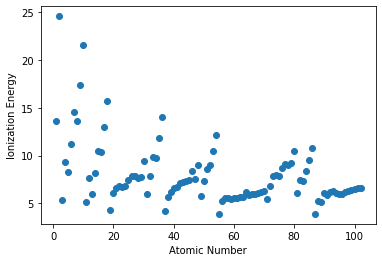

In [4]:
# Create a simple scatter plot of the Ionization Energy vs the Atomic number of each element.
ion_fig, ion_ax = plt.subplots()
ion_ax.scatter('AtomicNumber', 'IonizationEnergy', data=df)
ion_ax.set_xlabel('Atomic Number')
ion_ax.set_ylabel('Ionization Energy')

## Exercise 2 Solution

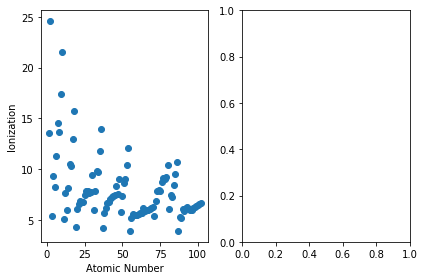

In [5]:
# Create a set of subplots of the two trends: Ionization Energy and Electronegativity.

comparison_fig, comparison_ax = plt.subplots(1, 2)
# Add the first subplot.
comparison_ax[0].scatter('AtomicNumber', 'IonizationEnergy', data=df)
comparison_ax[0].set_xlabel('Atomic Number')
comparison_ax[0].set_ylabel('Ionization')



comparison_fig.tight_layout()

In [6]:
# Add the second subplot.
comparison_ax[1].scatter('AtomicNumber', 'Electronegativity', data=df)
comparison_ax[1].set_xlabel('Atomic Number')
comparison_ax[1].set_ylabel('Electronegativity')

Text(215.175, 0.5, 'Electronegativity')

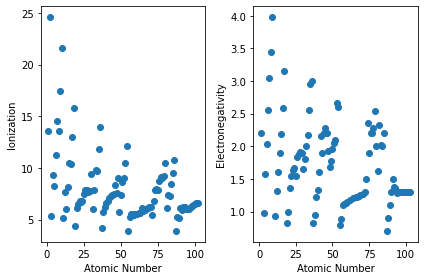

In [7]:
comparison_fig.tight_layout()
comparison_fig

## Exercise 3 Solution

In [8]:
# Determine possible states stored in the Dataframe
states = pd.unique(df['StandardState'])
states

array(['Gas', 'Solid', 'Liquid', 'Expected to be a Solid',
       'Expected to be a Gas'], dtype=object)

In [9]:
# Create a function that returns a different color for each type of standard state.
def assign_state_color(standard_state):
    state_markers = {'Gas': 'r',
                     'Solid': 'b',
                     'Liquid': 'g',
                     'Expected to be a Solid': 'y',
                     'Expected to be a Gas': 'k'}
    return state_markers[standard_state]

In [10]:
# Apply the function to the dataframe, creating a new column.
df['StateMarker'] = df['StandardState'].apply(assign_state_color)

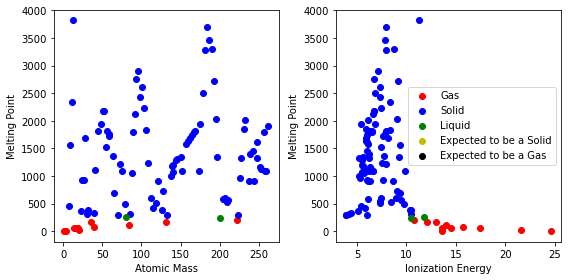

In [11]:
# Create a plot that uses the colors assigned to the table of the Atomic Mass vs the Melting Point.
state_fig, state_ax = plt.subplots(1, 2, figsize=(8,4))
state_ax[0].set_xlabel('Atomic Mass')
state_ax[0].set_ylabel('Melting Point')

# Add each state as a separate scatter to the same subplot.
for state in states:
    dataframe = df[df['StandardState'] == state]
    line = state_ax[0].scatter('AtomicMass', 'MeltingPoint', data=dataframe, color=dataframe.iloc[0]['StateMarker'])
    line.set_label(state)

state_ax[1].set_xlabel('Ionization Energy')
state_ax[1].set_ylabel('Melting Point')
for state in states:
    dataframe = df[df['StandardState'] == state]
    line = state_ax[1].scatter('IonizationEnergy', 'MeltingPoint', data=dataframe, color=dataframe.iloc[0]['StateMarker'])
    line.set_label(state)

# Create a legend
state_ax[1].legend(states)


state_fig.tight_layout()